In [10]:
import pandas as pd
import numpy as np
import codecs

import matplotlib as plt
import seaborn as sns

import re
import string


import nltk
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from keras.preprocessing.sequence import pad_sequences

import multiprocessing
from gensim.models import Word2Vec

from keras.preprocessing.text import Tokenizer


from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM

In [11]:
# !gdown --id 1GAJJWPMtapTN_Cxhdo2kL8VZa7PIQp7x

In [12]:
df = pd.read_json(codecs.open("df.json", "r", "utf-8"))

In [13]:
df.head()

,id,text,dialect
0,1165317340441063424,@SaIem @AlJazira_uae عشانك سويلم مسحته .. \n\n...,AE
1,1165334256937328640,@Dr_Humd تليفونك ، سماعة الايفون ، الايباد .. ...,AE
2,1165334824716034048,@Dr_Humd @Adel_AlBastaki اذا فونك ضاع تكون حاط...,AE
3,1165335027074207488,@_zmm4 @Adel_AlBastaki @Dr_Humd بيطلع وين اخر ...,AE
4,1165348372649259008,شنو هالنادي اللي كل لعيبته من المنتخب و يطلعلك...,AE


In [14]:
df.shape

(458197, 3)

In [15]:
df.head()

,id,text,dialect
0,1165317340441063424,@SaIem @AlJazira_uae عشانك سويلم مسحته .. \n\n...,AE
1,1165334256937328640,@Dr_Humd تليفونك ، سماعة الايفون ، الايباد .. ...,AE
2,1165334824716034048,@Dr_Humd @Adel_AlBastaki اذا فونك ضاع تكون حاط...,AE
3,1165335027074207488,@_zmm4 @Adel_AlBastaki @Dr_Humd بيطلع وين اخر ...,AE
4,1165348372649259008,شنو هالنادي اللي كل لعيبته من المنتخب و يطلعلك...,AE


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


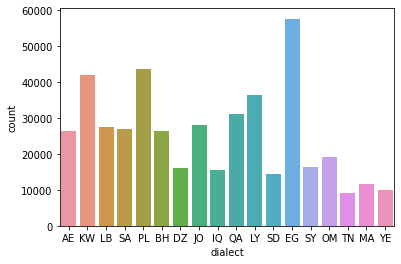

In [16]:
sns.countplot(df['dialect'])

## Data cleaning


In [17]:
##removing hashtags
def hashtag(text):
    pattern = r'#\w*'
    clean_text = re.sub(pattern,' ',text)
    return clean_text


##removing mentions
def mention(text):
    pattern = r'@\w*'
    clean_text = re.sub(pattern,' ',text)
    return clean_text


##removing puctuations
def puctuation(text):
    arabic_punctuations  = r'''`÷×؛<>_()*&^%][ـ،/:"\؟.,'{}~¦+|!”…“–ـ'''
    english_punctuations = string.punctuation
    punctuations_list = arabic_punctuations + english_punctuations
#     clean_text = re.sub(punctuations_list,' ',text)
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    #return clean_text



##removing diacritics
def diacritics(text):
    pattern = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    clean_text = re.sub(pattern, '', text)
    return clean_text


    
##removing digits
def digit(text):
    psttern = r'[~^0-9]'
    clean_text = ''.join([char for char in text if not char.isdigit()])
    return clean_text


##removing urls
def url(text):
    pattern = r'http[s]?://[^\s]+'
    clean_text = re.sub(pattern,' ',text)
    return clean_text


##removing emojis
def emoji(text):
    pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    clean_text = re.sub(pattern,' ',text)
    return clean_text


##removing extra_spaces
def extra_space(text):
    pattern = r'\s\s+'
    clean_text = re.sub(pattern,' ',text)
    #clean_text = "".join(text.split())
    return clean_text


def english_words(text):
    pattern = r'[a-zA-Z]'
    clean_text = re.sub(pattern, '', text)
    return clean_text


##remove repeated characters
def repeated_char(text):
    return re.sub(r'(.)\1+', r'\1', text)


##removing english characters
# def english_char(text):
#     pattern = r'[a-zA-Z]+'
#     clean_text = re.sub(pattern, '', text)
#     return clean_text


# def date(text):
#     pattern = r'\d{2}[-/.]?\d{2}[-/.]?\d{4}'
#     clean_text = re.sub(pattern,' ',text)
#     return clean_text


# def time(text):
#     pattern = r'\d{2}:\d{2} \w*'
#     clean_text = re.sub(pattern,' ',text)
#     return clean_text

#### all together

In [18]:
def clean_tweet(tweet):
    tweet = hashtag(tweet)
    tweet = mention(tweet)
    tweet = puctuation(tweet)
    tweet = digit(tweet)
    tweet = url(tweet)
    tweet = emoji(tweet)
    tweet = english_words(tweet)
    tweet = extra_space(tweet)
    tweet = diacritics(tweet)
    tweet = repeated_char(tweet)
    #tweet = english_char(tweet)
    #tweet = date(tweet)
    #tweet = time(tweet)
    #tweet = extra_space(tweet)
    return tweet

In [20]:
df['text'] = df['text'].apply(lambda x:clean_tweet(x))

In [21]:
df.tail(50)

,id,text,dialect
458147,1161576617673723904,ويعتدي عالمشجع ولاياتي الا شوط أو اقل خلص لاز...,SY
458148,1161577284656074752,ه واقف عالخط وناظر التبديل وطلع فراعه بيوقفوه...,SY
458149,1161578669514645504,ه ماهر معاقب واقف عالخط وناظر التبديل ويتبدل ...,SY
458150,1161985893449764864,الإتفاق الأمريكي الإيراني بيعطيهن الأريحيه,SY
458151,1130588925146357760,يلي بلشت فيهم عم كملهم,SY
458152,1131930493061128192,قال اكتر شي بخوفها بالحياة انو الناس يلي طلعت...,SY
458153,1132837388399648768,بالعكس انا بنصح كل حدا عملها او بدو يعملها لا...,SY
458154,1133709311715238016,عندي سفرة حوالي ساعتين ونص حدا عندو اقتراح لشي...,SY
458155,1133765350724706432,معلم هدول كتب صح حلوين بس بدهم مخمخة وقعدة رو...,SY
458156,1135212835951337600,شعبة التجنيد مابتفهم عليهم شي منوب بتحسهم بده...,SY


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [23]:
df.head()

,id,text,dialect
0,1165317340441063424,عشانك سويلم مسحته لكن الكلام الي قاله قوي,AE
1,1165334256937328640,تليفونك سماعة الايفون الايباد اذا ضيعته ب أي ...,AE
2,1165334824716034048,اذا فونك ضاع تكون حاط نفس ايميل الايباد و اطل...,AE
3,1165335027074207488,بيطلع وين اخر ظهور له,AE
4,1165348372649259008,شنو هالنادي الي كل لعيبته من المنتخب و يطلعلك ...,AE


In [24]:
# def get_top_tweet_bigrams(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

In [25]:
# # # plt.figure(figsize=(10,5))
# top_tweet_bigrams=get_top_tweet_bigrams(df[df['dialect']=='SA']['tweets'])[:20]
# # # x,y=map(list,zip(*top_tweet_bigrams))
# # # sns.barplot(x=y,y=x)
# top_tweet_bigrams

In [26]:
# top_tweet_bigrams

## tokenization

In [27]:
# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     return tokens

In [28]:
# df['tweets'] = df['tweets'].apply(lambda x:tokenize(x))

In [29]:
# df.head(20)

## data splitting

In [30]:
df['dialect'] = df['dialect'].map({'IQ':0, 'LY':1, 'QA':2, 'PL':3, 'SY':4, 'TN':5, 'JO':6 , 'MA':7, 'SA':8, 'YE':9, 'DZ':10, 'EG':11, 'LB':12, 'KW':13, 'OM':14, 'SD':15, 'AE':16, 'BH':17})

In [31]:
df['dialect'].value_counts()

11    57636
3     43742
13    42109
1     36499
2     31069
6     27921
12    27617
8     26832
16    26296
17    26292
14    19116
4     16242
10    16183
0     15497
15    14434
7     11539
9      9927
5      9246
Name: dialect, dtype: int64

In [45]:
x = df['text']
y = df['dialect']

In [46]:
x_train,x_val,y_train,y_val=train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(412377,)
(45820,)
(412377,)
(45820,)


In [47]:
y_val

217576    11
344491    14
380119     8
133458     6
98921     16
          ..
356845     2
369306     2
301958     4
163932    13
51852     17
Name: dialect, Length: 45820, dtype: int64

## implementing word2vec

In [48]:
documents = [text.split() for text in x_train] 
len(documents)

412377

In [50]:
w2v_model = Word2Vec(size=300, window=5, min_count=1, workers=3)

In [51]:
w2v_model.build_vocab(documents)

In [56]:
vocab_len = len(w2v_model.wv.vocab)
print("Vocab size", vocab_len)

Vocab size 421594


In [57]:
w2v_model.train(documents,total_examples=len(documents),epochs=10)

(49863101, 53540360)

In [58]:
w2v_model.wv.similar_by_word('صغير')

[('كبير', 0.6836452484130859),
 ('طفل', 0.6585379838943481),
 ('شاب', 0.647883415222168),
 ('مخلص', 0.6369431614875793),
 ('ميت', 0.6104898452758789),
 ('فقير', 0.5948500037193298),
 ('مشهور', 0.5898910760879517),
 ('ضايع', 0.5834872722625732),
 ('صديق', 0.579833447933197),
 ('وأقنعني', 0.5782203078269958)]

In [59]:
# w2v_model.wv.vectors[0]

In [60]:
w2v_model.wv.n_similarity(['جيد'],['حلو'])

0.37050065

In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_vocabs = list(tokenizer.word_index.keys()) 
vocab_size = len(tokenizer.word_index) + 1
print('total words:',vocab_size)

total words: 421709


In [62]:
# # Defining a function which takes text input and returns one vector for each sentence
# def text2vec(text):
#     word_vec = tokenizer.texts_to_sequences(text)
#     w2v_Data=[]
#     for sent in text:
#         Sentence = np.zeros(300)
#         for word in sent.split():
#             if word in w2v_model.wv.key_to_index.keys():    
#                 Sentence=Sentence+w2v_model.wv[word]
#         # Appending the sentence to the dataframe
#         w2v_Data.append(Sentence)
#     return w2v_Data
        
    
    
 

In [63]:
# x_train = text2vec(x_train)
# x_test = text2vec(x_val)
# len(x_train)

In [64]:
# f = text2vec('هلا')


In [65]:
#tokenizer.word_index.keys() ##vocabs key is vocab value is freq

In [66]:
# sequences[:2]

In [67]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# #  
# # Converting the text to numeric data
# X = vectorizer.fit_transform(x_train)

In [68]:
# type(vectorizer.get_feature_names()[0])

In [69]:
# len(vectorizer.get_feature_names())+1

In [70]:
# len(list(w2v_model.wv.key_to_index.keys()))

In [71]:
# x_train[0].shape

In [72]:
def text2vec(text):
    word_vec = tokenizer.texts_to_sequences(text)
    text_vec = pad_sequences(word_vec, maxlen=300)
    return text_vec
    

In [73]:
x_train = text2vec(x_train)
x_test = text2vec(x_val)

In [74]:
# text2vec(df['tweets'][:5])

In [75]:
# text = ['لا احب مصر','هذا غلط']
# word_vec = tokenizer.texts_to_sequences(text)
# W2Vec_Data=[]
# for sent in text:
#     Sentence = np.zeros(300)
#     for word in sent.split():
#         if word in w2v_model.wv.key_to_index.keys():    
#                 Sentence=Sentence+w2v_model.wv[word]
#         # Appending the sentence to the dataframe
#     W2Vec_Data.append(Sentence)
# W2Vec_Data
        
    

In [76]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_val", x_test.shape)
print("y_val", y_val.shape)

x_train (412377, 300)
y_train (412377,)

x_val (45820, 300)
y_val (45820,)


In [77]:
# embedding_matrix = {}
# keys = vocab_size
# values = word_vocabs
# for word, key in zip(values,range(keys)):
#     if word in w2v_model.wv.key_to_index.keys():
#         embedding_matrix[word] = w2v_model.wv[word]
vocab_size

421709

In [78]:
embedding_matrix = {}
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(421709, 300)


In [79]:

# from sklearn.naive_bayes import GaussianNB, MultinomialNB
 
# # GaussianNB is used in Binomial Classification
# # MultinomialNB is used in multi-class classification
# #clf = GaussianNB()
# clf = MultinomialNB()
 
# # Printing all the parameters of Naive Bayes
# print(clf)
 
# NB=clf.fit(x_train,y_train)
# prediction=NB.predict(x_test)
 
# # Measuring accuracy on Testing Data
# from sklearn import metrics
# print(metrics.classification_report(y_val, prediction))
# print(metrics.confusion_matrix(y_val, prediction))
 
# # Printing the Overall Accuracy of the model
# F1_Score=metrics.f1_score(y_val, prediction, average='weighted')
# print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# # Importing cross validation function from sklearn
# from sklearn.model_selection import cross_val_score
 
# # Running 10-Fold Cross validation on a given algorithm
# # Passing full data X and y because the K-fold will split the data and automatically choose train/test




# # Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
# # print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
# # print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [80]:

# from sklearn.svm import SVC
 
# # GaussianNB is used in Binomial Classification
# # MultinomialNB is used in multi-class classification
# #clf = GaussianNB()


# # start = time.time() 

# clf = SVC()
# clf.fit(x_train,y_train)

# print(clf)
 
# sv=clf.fit(x_train,y_train)
# prediction=sv.predict(x_test)
 
# # Measuring accuracy on Testing Data
# from sklearn import metrics
# print(metrics.classification_report(y_val, prediction))
# print(metrics.confusion_matrix(y_val, prediction))
 
# # Printing the Overall Accuracy of the model
# F1_Score=metrics.f1_score(y_val, prediction, average='weighted')
# print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# # Importing cross validation function from sklearn
# from sklearn.model_selection import cross_val_score
 
# # Running 10-Fold Cross validation on a given algorithm
# # Passing full data X and y because the K-fold will split the data and automatically choose train/test




# # Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
# # print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
# # print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [81]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix

In [82]:
# classifier = GaussianNB();
# classifier.fit(x_train, y_train)

In [83]:
# y_pred = classifier.predict(x_test)
 
# # # making the confusion matrix
# # cm = confusion_matrix(y_val, y_pred)
# # cm

In [84]:
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# print('Accuracy achieved is ' + str(np.mean(y_pred == y_val)))
# # print(metrics.classification_report(y_val, y_pred)),
# # metrics.confusion_matrix(y_val, y_pred)

In [85]:
# from sklearn.svm import SVC

In [86]:
# # start = time.time() 

# svm_classifier = SVC()
# svm_classifier.fit(x_train,y_train)

# end = time.time()
# # process = round(end-start,2)
# # print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

In [87]:
# svm_classifier.score(x_test,y_test)

In [88]:
len(embedding_matrix)

421709

In [ ]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(18, activation='softmax'))

model.summary()

#
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
#               EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]


epochs = 5
batch_size = 128
history = model.fit(x_train, y_train, epochs=8, 
                    batch_size = batch_size, validation_split=0.1,
                    callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          126512700 
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dense (Dense)               (None, 18)                1170      
                                                                 
Total params: 126,607,310
Trainable params: 94,610
Non-trainable params: 126,512,700
_________________________________________________________________
Epoch 1/8
2900/2900 [==============================] - 4573s 2s/step - loss: 1.8999 - accuracy: 0.3930 - val_loss: 1.7558 - val_accuracy: 0.4391
Epoch 2/8
2900/2900 [===

In [ ]:
y_train.reshape(412377,1)
y_train

In [ ]:
# x_train_lst = df['tweets'].tolist()
# cores = multiprocessing.cpu_count() 
# cores
# w2v_model = Word2Vec(vector_size=300, window=5, min_count=1, workers=cores-1, sg= 1)
# w2v_model.build_vocab(x_train_lst)

# w2v_model.train(x_train_lst, total_examples= len(x_train_lst),epochs=10)

# w2v_model.wv.n_similarity(['جيد'],['حلو'])

# model = Word2Vec(sentences=x_train_lst, vector_size=300, window=5, min_count=1, workers=cores-1, sg= 1)
# w2v_model.wv.vectors.shape





# import time
# w2v_model = Word2Vec(min_count=20,
#                      window=2,
#                      vector_size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,
#                      workers=cores-1)


# t = time()

# w2v_model.build_vocab(data, progress_per=10000)

# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

# model.wv.get_vector('من')
# model.wv.n_similarity(['جيد'],['حلو'])





In [42]:
# from sklearn.feature_extraction.text import CountVectorizer
 
# # Ticket Data
# corpus = df['tweets'].values
 
# # Creating the vectorizer
# vectorizer = CountVectorizer()
 
# # Converting the text to numeric data
# X = vectorizer.fit_transform(corpus)
 
# type(X)

In [43]:
# X.shape

In [44]:
# vectorizer.get_feature_names()[:-20]